<a href="https://colab.research.google.com/github/thrishact/Fake_Review_Detection_using_ML/blob/main/Fakereviewdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('/Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5,1,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen_5,5,1,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen_5,5,1,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen_5,1,1,miss inform use great product price i
4,4,Home_and_Kitchen_5,5,1,veri nice set good qualiti we set two month


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,1,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5,1,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5,1,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1,1,miss inform use great product price i
4,Home_and_Kitchen_5,5,1,veri nice set good qualiti we set two month


In [ ]:
df.dropna(inplace=True)


In [ ]:
df['length'] = df['text_'].apply(len)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40431 non-null  object
 1   rating    40431 non-null  int64 
 2   label     40431 non-null  int64 
 3   text_     40431 non-null  object
 4   length    40431 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.9+ MB


<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40431 non-null  object
 1   rating    40431 non-null  int64 
 2   label     40431 non-null  int64 
 3   text_     40431 non-null  object
 4   length    40431 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.9+ MB


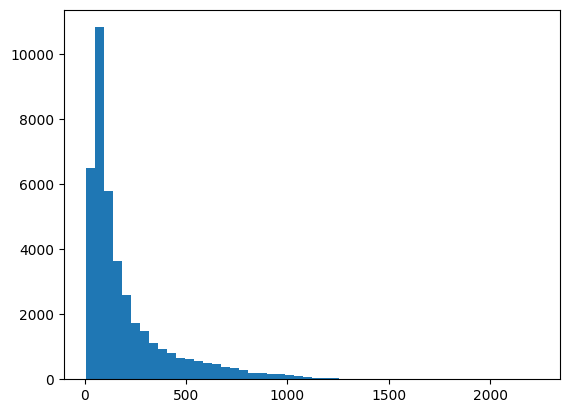

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib and give it the alias "plt"

df.dropna(inplace=True)
df['length'] = df['text_'].apply(len)
df.info()

plt.hist(df['length'],bins=50) # Now plt is defined and the hist function can be accessed
plt.show()

In [ ]:
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
0      20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   
1      20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   

                                                                 
             mean         std   min   25%    50%    75%     max  
label                                                            
0      237.892412  252.919324   8.0  74.0  134.0  296.0  2232.0  
1      173.638783  173.955025  13.0  57.0   99.0  217.0  1300.0

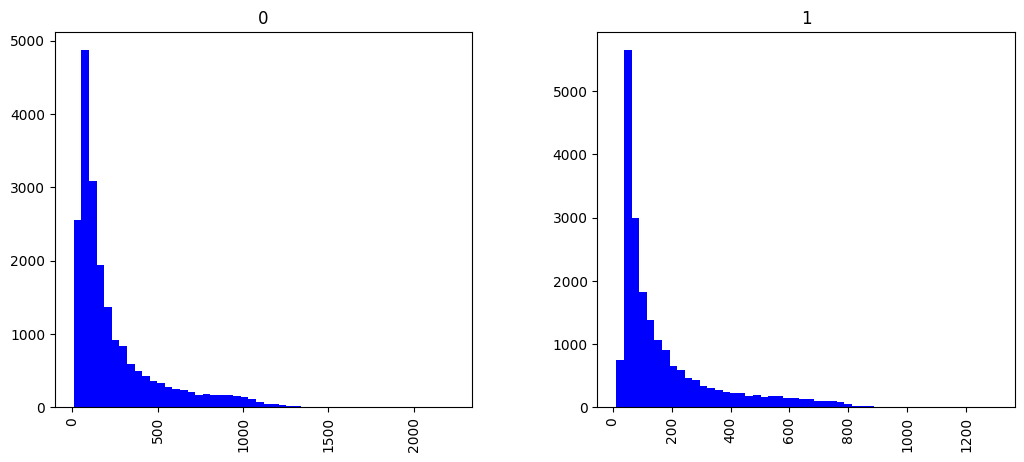

In [ ]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()


In [ ]:
import pandas as pd

def get_longest_text_for_label(df, label):
    """
    Retrieves the longest text for a given label.
    Handles the case where no data exists for the label.
    """
    filtered_df = df[df['label'] == label][['text_', 'length']].sort_values(by='length', ascending=False)
    if filtered_df.empty:
        return "No data found for label: " + label
    else:
        return filtered_df.iloc[0].text_
longest_text = get_longest_text_for_label(df, 'OR')
print(longest_text)

No data found for label: OR


In [ ]:
df.length.describe()

,length
count,40431.000000
mean,205.766392
std,219.421232
min,8.000000
25%,64.000000
50%,116.000000
75%,253.000000
max,2232.000000


In [ ]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # Import the CountVectorizer class

bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x79b0b4958c10>)

In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34451


In [ ]:
review4 = df['text_'][3]
review4

'miss inform use great product price i'

In [ ]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 13598)	1
  (0, 15840)	1
  (0, 19848)	1
  (0, 23847)	1
  (0, 23977)	1
  (0, 32183)	1
(1, 34451)


In [ ]:
# Instead of using get_feature_names, use get_feature_names_out
print(bow_transformer.get_feature_names_out()[15841])
print(bow_transformer.get_feature_names_out()[23848])

informationdirect
pricecategori


In [ ]:
bow_reviews = bow_transformer.transform(df['text_'])

In [ ]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 34451)
Amount of non zero values in the bag of words model: 1013899


In [ ]:
import numpy as np # Importing the numpy library and assigning it the alias 'np'

print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer # Import the TfidfTransformer class from the sklearn library

tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13598)	1
  (0, 15840)	1
  (0, 19848)	1
  (0, 23847)	1
  (0, 23977)	1
  (0, 32183)	1


In [ ]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.821684385176731


In [ ]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 34451)
No. of Dimensions: 2


**Creating training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split # Import the train_test_split function

review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

In [ ]:
from sklearn.pipeline import Pipeline # Import the Pipeline class
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

**Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data**

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7bd003f4b6d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions = pipeline.predict(review_test)
predictions

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

NameError: name 'label_test' is not defined

In [ ]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

NameError: name 'label_test' is not defined

In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7bd003f4b6d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

           0       0.87      0.80      0.83      7102
           1       0.81      0.88      0.84      7049

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix: [[5675 1427]
 [ 857 6192]]
Accuracy Score: 0.8385979789414175
Model Prediction Accuracy: 83.86%


In [ ]:


pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])


In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7bd003f4b6d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [ ]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

           0       0.74      0.72      0.73      7102
           1       0.72      0.74      0.73      7049

    accuracy                           0.73     14151
   macro avg       0.73      0.73      0.73     14151
weighted avg       0.73      0.73      0.73     14151

Confusion Matrix: [[5108 1994]
 [1799 5250]]
Accuracy Score: 0.7319624054837114
Model Prediction Accuracy: 73.2%


In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7bd003f4b6d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
knn_pred = pipeline.predict(review_test)
knn_pred

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

           0       0.76      0.58      0.66      7102
           1       0.66      0.82      0.73      7049

    accuracy                           0.70     14151
   macro avg       0.71      0.70      0.69     14151
weighted avg       0.71      0.70      0.69     14151

Confusion Matrix: [[4088 3014]
 [1256 5793]]
Accuracy Score: 0.6982545403151721
Model Prediction Accuracy: 69.83%


In [ ]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [ ]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7bd003f4b6d0>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [ ]:
svc_pred = pipeline.predict(review_test)
svc_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

           0       0.87      0.89      0.88      7102
           1       0.89      0.87      0.88      7049

    accuracy                           0.88     14151
   macro avg       0.88      0.88      0.88     14151
weighted avg       0.88      0.88      0.88     14151

Confusion Matrix: [[6339  763]
 [ 923 6126]]
Accuracy Score: 0.8808564765740937
Model Prediction Accuracy: 88.09%


In [ ]:

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [ ]:
pipeline.fit(review_train,label_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7bd003f4b6d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [ ]:
lr_pred = pipeline.predict(review_test)
lr_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.87      0.86      7102
           1       0.87      0.86      0.86      7049

    accuracy                           0.86     14151
   macro avg       0.86      0.86      0.86     14151
weighted avg       0.86      0.86      0.86     14151

Confusion Matrix: [[6191  911]
 [1022 6027]]
Accuracy Score: 0.8634018797258144
Model Prediction Accuracy: 86.34%


**Conclusion**

In [ ]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 86.34%
K Nearest Neighbors Prediction Accuracy: 69.83%
Decision Tree Classifier Prediction Accuracy: 73.2%
Random Forests Classifier Prediction Accuracy: 83.86%
Support Vector Machines Prediction Accuracy: 88.09%
Multinomial Naive Bayes Prediction Accuracy: 84.35%
